In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/zillow_para_integrar_Preparation.csv', delimiter=';')
df.head()

,Unnamed: 0,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,ZHVIPerSqft_AllHomes,AverageHousePrice,MedianRentalPrice_AllHomes
0,0,1001,Autauga,Alabama,15,1,4.00,3.6,72.56,114483.67,1255.21
1,1,1003,Baldwin,Alabama,47,4,3.00,3.6,90.39,164861.69,1165.94
2,2,1069,Houston,Alabama,31,5,3.50,4.1,72.94,114941.00,975.63
3,3,1073,Jefferson,Alabama,226,14,2.75,3.7,68.25,99759.77,855.86
4,4,1081,Lee,Alabama,37,1,4.00,3.6,74.79,148163.22,1143.89


In [ ]:
df_1= df[['StateName','AverageHospitalRating']]
df_1.head()

,StateName,AverageHospitalRating
0,Alabama,4.00
1,Alabama,3.00
2,Alabama,3.50
3,Alabama,2.75
4,Alabama,4.00


In [ ]:
df_1.describe()

,AverageHospitalRating
count,454.000000
mean,2.992621
std,0.651571
min,1.000000
25%,2.600000
50%,3.000000
75%,3.422500
max,4.500000


In [ ]:
df['AverageHospitalRating']=df['AverageHospitalRating'].fillna(value=2.99, axis= 0)

In [ ]:
df_A=pd.read_csv('/content/crime_para_integrar_Preparation.csv', delimiter=';')
df_A.head()

,Unnamed: 0,county_name,crime_rate_per_100000,FIPS_ST,FIPS_ST_FIPS_CTY,FIPS_CTY
0,0,"St. Louis city, MO",1791.995377,29,29510,510
1,1,"Crittenden County, AR",1754.914968,5,5035,35
2,2,"Alexander County, IL",1664.700485,17,17003,3
3,3,"Kenedy County, TX",1456.310680,48,48261,261
4,4,"De Soto Parish, LA",1447.402430,22,22031,31


In [ ]:
df_A = df_A[['FIPS_ST_FIPS_CTY','crime_rate_per_100000']]
df_A.head()

,FIPS_ST_FIPS_CTY,crime_rate_per_100000
0,29510,1791.995377
1,5035,1754.914968
2,17003,1664.700485
3,48261,1456.310680
4,22031,1447.402430


In [ ]:
dataset = pd.merge(df, df_A, how='left', left_on='FIPS', right_on='FIPS_ST_FIPS_CTY')
dataset.head()

,Unnamed: 0,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,ZHVIPerSqft_AllHomes,AverageHousePrice,MedianRentalPrice_AllHomes,FIPS_ST_FIPS_CTY,crime_rate_per_100000
0,0,1001,Autauga,Alabama,15,1,4.00,3.6,72.56,114483.67,1255.21,1001.0,251.601926
1,1,1003,Baldwin,Alabama,47,4,3.00,3.6,90.39,164861.69,1165.94,1003.0,228.086325
2,2,1069,Houston,Alabama,31,5,3.50,4.1,72.94,114941.00,975.63,1069.0,401.281012
3,3,1073,Jefferson,Alabama,226,14,2.75,3.7,68.25,99759.77,855.86,1073.0,798.357491
4,4,1081,Lee,Alabama,37,1,4.00,3.6,74.79,148163.22,1143.89,1081.0,246.466975


In [ ]:
dataset= dataset[['FIPS','CountyName','StateName','NumberOfSchools','NumberOfHospitals','AverageHospitalRating','UnemploymentRate','crime_rate_per_100000','AverageHousePrice','ZHVIPerSqft_AllHomes','MedianRentalPrice_AllHomes']]

In [ ]:
dataset.head()

,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
0,1001,Autauga,Alabama,15,1,4.00,3.6,251.601926,114483.67,72.56,1255.21
1,1003,Baldwin,Alabama,47,4,3.00,3.6,228.086325,164861.69,90.39,1165.94
2,1069,Houston,Alabama,31,5,3.50,4.1,401.281012,114941.00,72.94,975.63
3,1073,Jefferson,Alabama,226,14,2.75,3.7,798.357491,99759.77,68.25,855.86
4,1081,Lee,Alabama,37,1,4.00,3.6,246.466975,148163.22,74.79,1143.89


In [ ]:
dataset['crime_rate_per_100000'] =dataset['crime_rate_per_100000'].fillna(value=344,axis= 0)

In [ ]:
dataset.to_csv(r'/content/dataset.csv', index = False)

Reescalamos los datos en un rango de 0 a 1.

In [ ]:
array = dataset.values
X = array[:,3:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.003 0.    0.857 0.131 0.124]
 [0.017 0.023 0.571 0.131 0.111]
 [0.01  0.031 0.714 0.163 0.209]
 [0.096 0.1   0.5   0.137 0.435]
 [0.013 0.    0.857 0.131 0.121]]


Estandarizar datos, media 0 y desviación stándar 1

In [ ]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
print(rescaledX[0:5,:])

[[-0.604 -0.643  1.681 -0.236 -0.409]
 [-0.404 -0.344  0.013 -0.236 -0.512]
 [-0.504 -0.244  0.847  0.211  0.252]
 [ 0.716  0.653 -0.404 -0.147  2.006]
 [-0.467 -0.643  1.681 -0.236 -0.431]]


Selección de caracteristicas

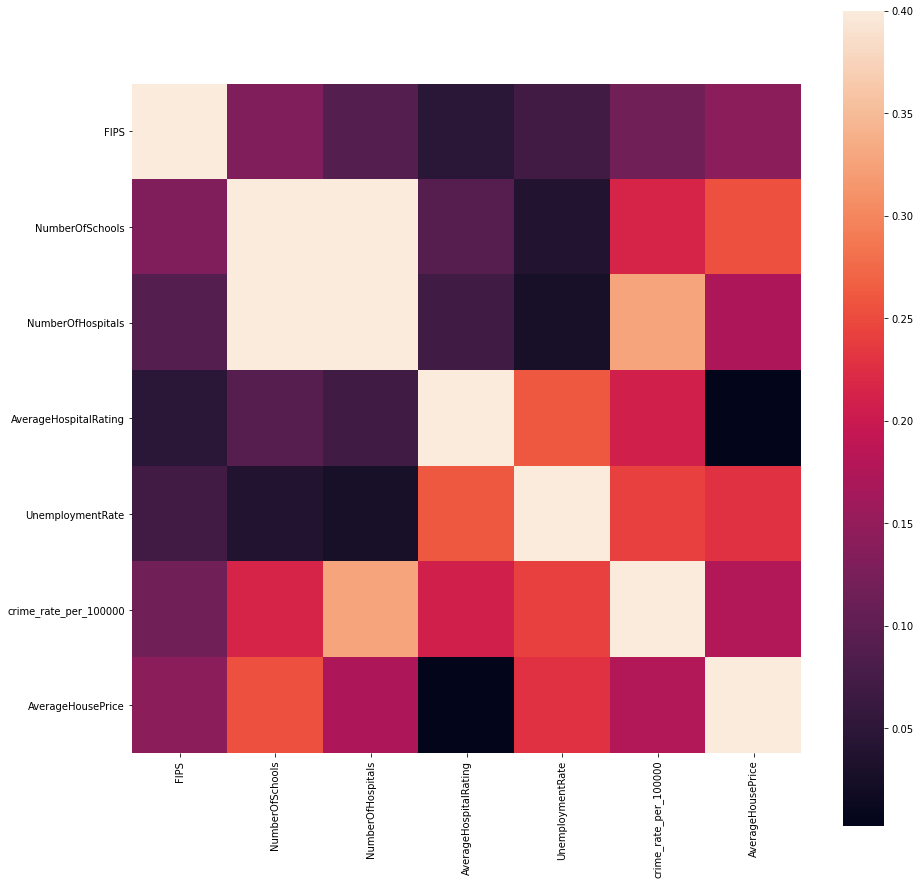

In [ ]:
corrmat = dataset.iloc[:,0:9].corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat.abs(), vmax=.4, square=True)

In [ ]:
corrmat

,FIPS,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice
FIPS,1.000000,-0.130805,-0.090345,0.046770,-0.071574,-0.118640,-0.141607
NumberOfSchools,-0.130805,1.000000,0.924452,-0.092216,0.038775,0.213603,0.254816
NumberOfHospitals,-0.090345,0.924452,1.000000,-0.069775,0.028455,0.328029,0.172290
AverageHospitalRating,0.046770,-0.092216,-0.069775,1.000000,-0.260422,-0.208806,0.002206
UnemploymentRate,-0.071574,0.038775,0.028455,-0.260422,1.000000,0.242979,-0.227533
crime_rate_per_100000,-0.118640,0.213603,0.328029,-0.208806,0.242979,1.000000,-0.177137
AverageHousePrice,-0.141607,0.254816,0.172290,0.002206,-0.227533,-0.177137,1.000000


In [ ]:
dataset_modelo= dataset[['FIPS','CountyName','StateName','NumberOfSchools','UnemploymentRate','crime_rate_per_100000','AverageHousePrice','ZHVIPerSqft_AllHomes','MedianRentalPrice_AllHomes']]

In [ ]:
dataset_modelo.head()

,FIPS,CountyName,StateName,NumberOfSchools,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
0,1001,Autauga,Alabama,15,3.6,251.601926,114483.67,72.56,1255.21
1,1003,Baldwin,Alabama,47,3.6,228.086325,164861.69,90.39,1165.94
2,1069,Houston,Alabama,31,4.1,401.281012,114941.00,72.94,975.63
3,1073,Jefferson,Alabama,226,3.7,798.357491,99759.77,68.25,855.86
4,1081,Lee,Alabama,37,3.6,246.466975,148163.22,74.79,1143.89


In [ ]:
dataset.head()

,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
0,1001,Autauga,Alabama,15,1,4.00,3.6,251.601926,114483.67,72.56,1255.21
1,1003,Baldwin,Alabama,47,4,3.00,3.6,228.086325,164861.69,90.39,1165.94
2,1069,Houston,Alabama,31,5,3.50,4.1,401.281012,114941.00,72.94,975.63
3,1073,Jefferson,Alabama,226,14,2.75,3.7,798.357491,99759.77,68.25,855.86
4,1081,Lee,Alabama,37,1,4.00,3.6,246.466975,148163.22,74.79,1143.89


In [ ]:
dataset_estad = dataset.groupby('StateName').mean()
dataset_estad.head()

,FIPS,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
StateName,,,,,,,,,
Alabama,1074.333333,64.111111,4.222222,3.248889,3.755556,367.623005,126389.502222,77.595556,1091.183333
Alaska,2055.000000,68.500000,6.000000,3.000000,5.800000,503.463649,224431.545000,141.545000,1644.420000
Arizona,4016.000000,272.875000,15.500000,2.537500,6.425000,357.172732,162983.865000,99.871250,1164.912500
Arkansas,5081.500000,54.500000,7.500000,2.833750,3.225000,443.758312,110337.643750,68.406250,986.997500
California,6063.764706,279.588235,15.470588,2.891176,4.464706,416.132304,347019.674412,224.356471,2044.105882


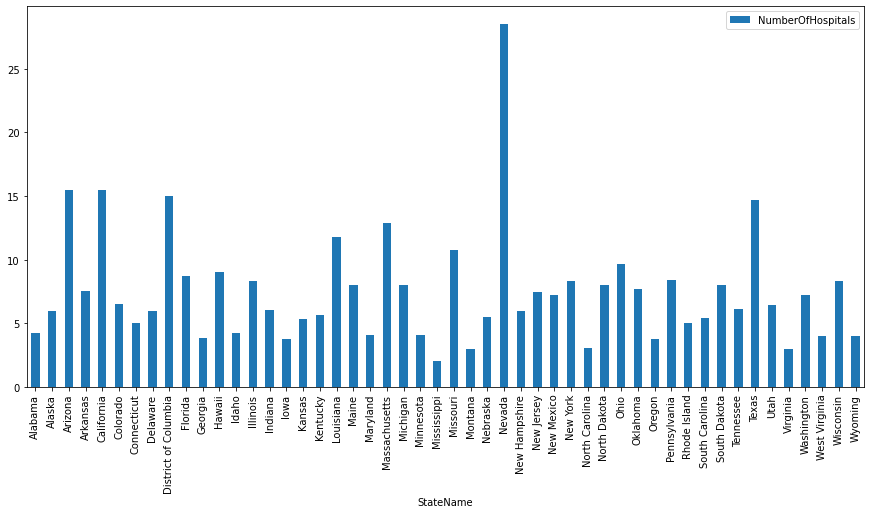

In [ ]:
ax = dataset_estad.plot.bar( y='NumberOfHospitals', rot=90, figsize=(15,7))

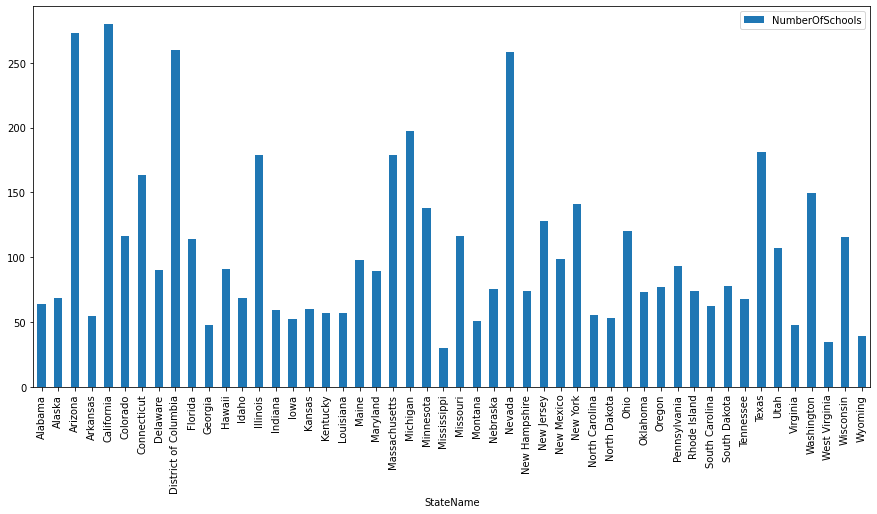

In [ ]:
ax = dataset_estad.plot.bar( y='NumberOfSchools', rot=90, figsize=(15,7))

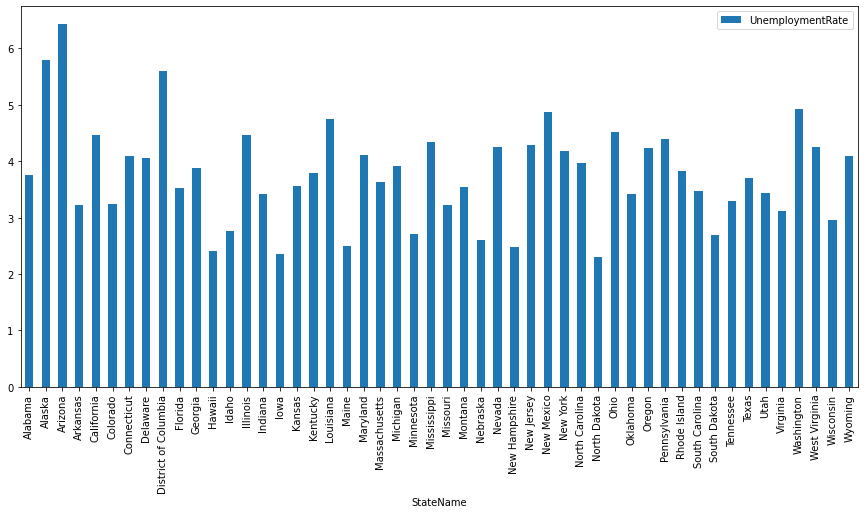

In [ ]:
ax = dataset_estad.plot.bar( y='UnemploymentRate', rot=90, figsize=(15,7))

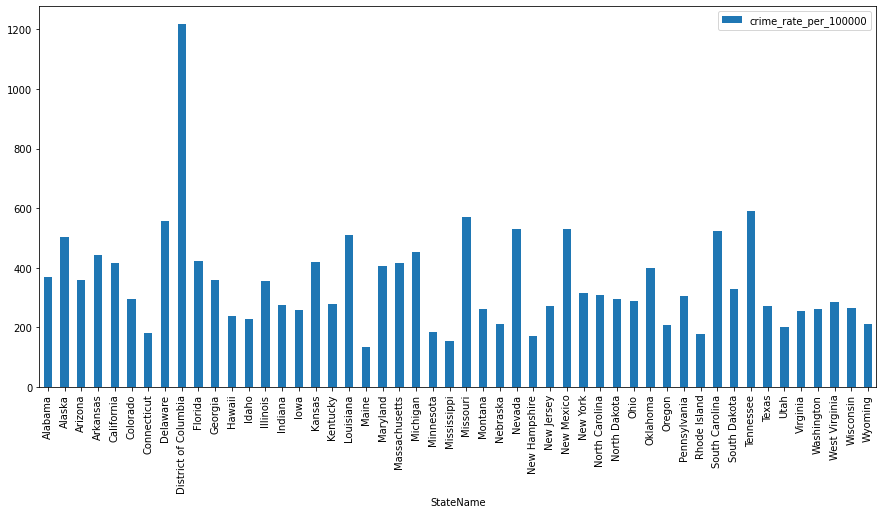

In [ ]:
ax = dataset_estad.plot.bar( y='crime_rate_per_100000', rot=90, figsize=(15,7))

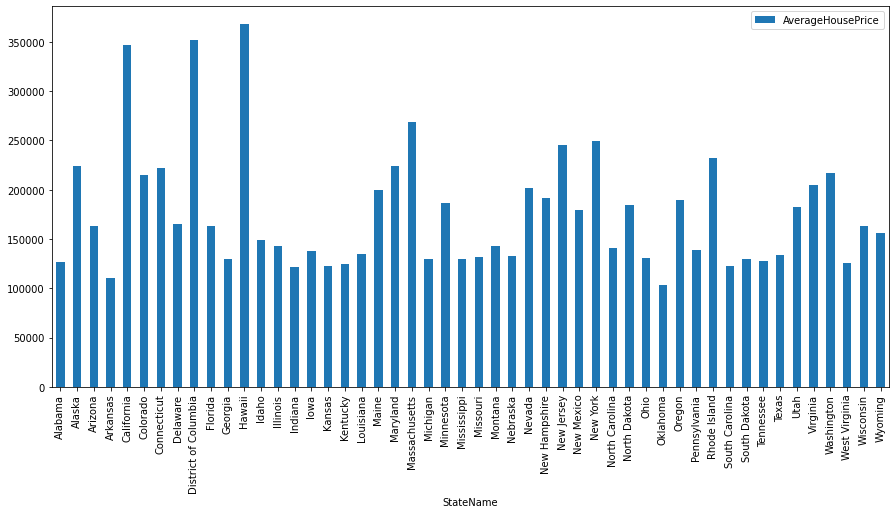

In [ ]:
ax = dataset_estad.plot.bar( y='AverageHousePrice', rot=90, figsize=(15,7))

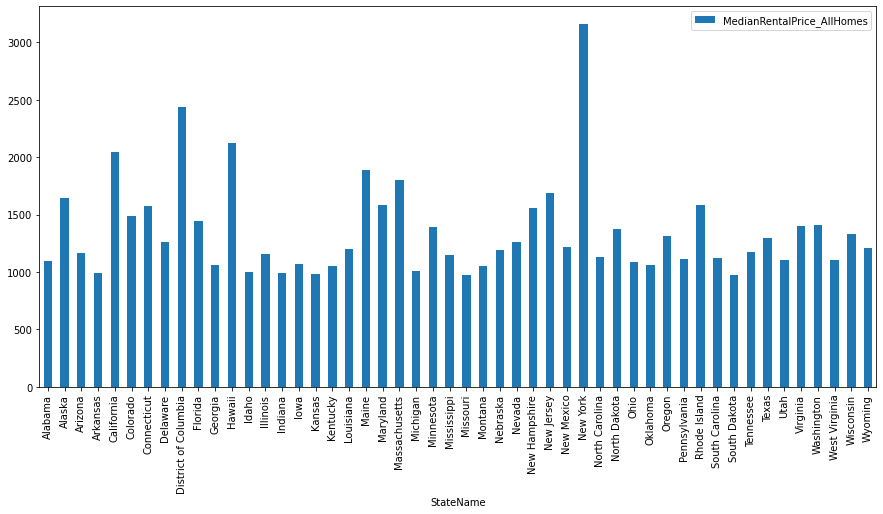

In [ ]:
ax = dataset_estad.plot.bar( y='MedianRentalPrice_AllHomes', rot=90, figsize=(15,7))

In [ ]:
dataset_estad_map= dataset_estad.reset_index()

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
dataset_estad_map['abbrev'] = dataset_estad_map['StateName'].map(us_state_abbrev)

In [ ]:
dataset_estad_map.head()

,StateName,FIPS,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes,abbrev
0,Alabama,1074.333333,64.111111,4.222222,3.248889,3.755556,367.623005,126389.502222,77.595556,1091.183333,AL
1,Alaska,2055.000000,68.500000,6.000000,3.000000,5.800000,503.463649,224431.545000,141.545000,1644.420000,AK
2,Arizona,4016.000000,272.875000,15.500000,2.537500,6.425000,357.172732,162983.865000,99.871250,1164.912500,AZ
3,Arkansas,5081.500000,54.500000,7.500000,2.833750,3.225000,443.758312,110337.643750,68.406250,986.997500,AR
4,California,6063.764706,279.588235,15.470588,2.891176,4.464706,416.132304,347019.674412,224.356471,2044.105882,CA


In [ ]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(dataset_estad_map,  # Input Pandas DataFrame
                    locations="abbrev",  # DataFrame column with locations
                    color="ZHVIPerSqft_AllHomes",  # DataFrame column with color values
                     # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Valor promedio por pie cuadrado de las casas en USA', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [ ]:
df = pd.read_csv('/content/State_time_series.csv')
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,...,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61500.0,48900.0,78200.0,146500.0,206300.0,79500.0,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59200.0,86400.0,96100.0,128400.0,190500.0,103600.0,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53000.0,54500.0,76800.0,135100.0,186000.0,64400.0,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93700.0,123400.0,150900.0,196100.0,265300.0,157900.0,95100.0,136100.0,157900

In [ ]:
dfallhomes = df.groupby('RegionName', as_index=False)['ZHVI_AllHomes'].\
    mean().dropna().sort_values('ZHVI_AllHomes', ascending=False)
dfallhomes.head(6)

,RegionName,ZHVI_AllHomes
11,Hawaii,399382.758621
8,DistrictofColumbia,351876.681614
4,California,347527.586207
21,Massachusetts,280672.796935
32,NewYork,269655.200000
30,NewJersey,259898.467433


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



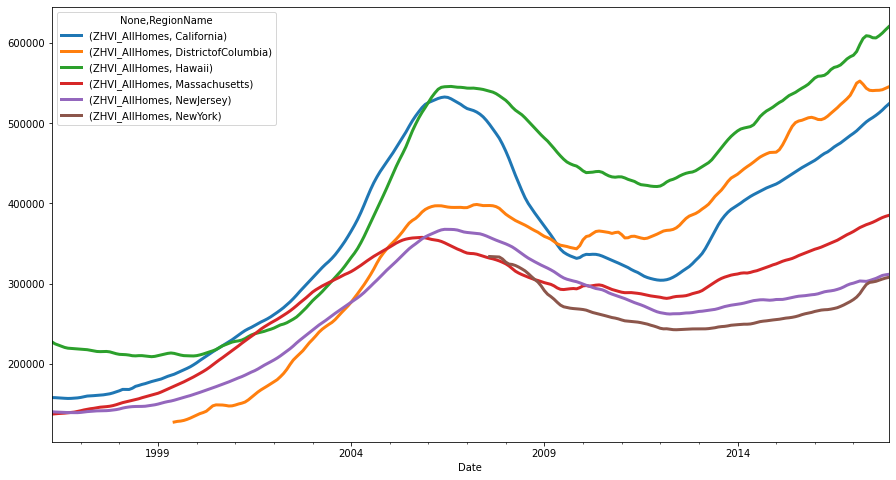

In [ ]:
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','ZHVI_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','ZHVI_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

In [ ]:
dfallhomes = df.groupby('RegionName', as_index=False)['ZHVIPerSqft_AllHomes'].\
    mean().dropna().sort_values('ZHVIPerSqft_AllHomes', ascending=False)
dfallhomes.head(6)

,RegionName,ZHVIPerSqft_AllHomes
8,DistrictofColumbia,326.632287
11,Hawaii,315.620690
4,California,226.099617
21,Massachusetts,179.908046
1,Alaska,160.465812
30,NewJersey,155.977011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



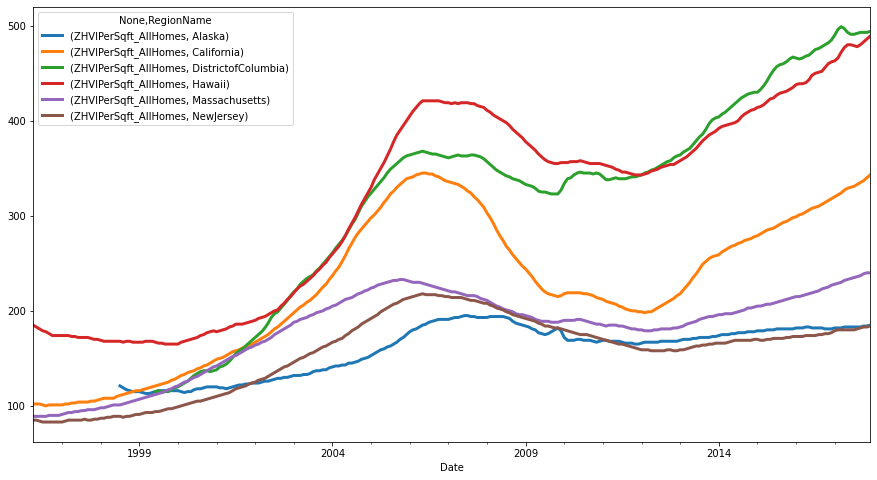

In [ ]:
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'Alaska', 'NewJersey']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','ZHVIPerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','ZHVIPerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

In [ ]:
dfallhomes = df.groupby('RegionName', as_index=False)['ZHVIPerSqft_AllHomes'].\
    mean().dropna().sort_values('ZHVIPerSqft_AllHomes', ascending=False)
dfallhomes.tail(6)

,RegionName,ZHVIPerSqft_AllHomes
43,Texas,69.450199
0,Alabama,67.068966
3,Arkansas,60.229885
36,Oklahoma,58.544061
24,Mississippi,58.314176
49,WestVirginia,56.808765


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



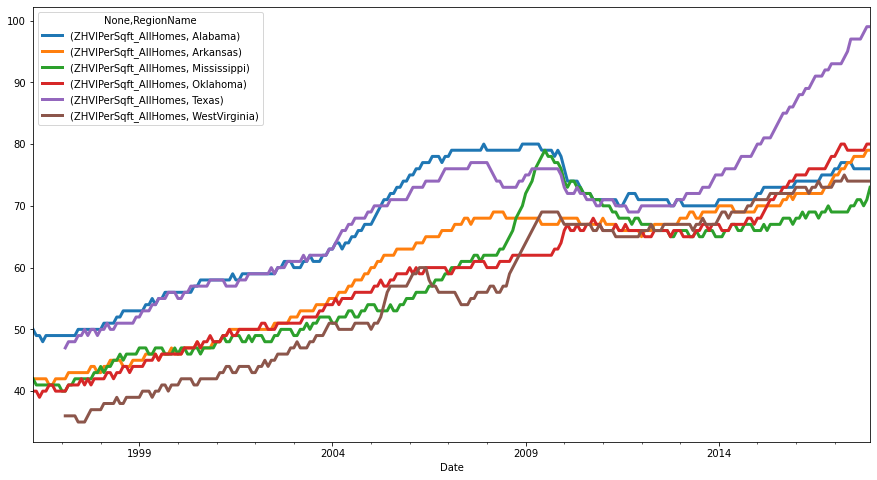

In [ ]:
statelist = ['Texas', 'Alabama', 'Arkansas', 'Oklahoma', 'Mississippi', 'WestVirginia']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','ZHVIPerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','ZHVIPerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

In [ ]:
dataset_modelo.head()

,FIPS,CountyName,StateName,NumberOfSchools,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
0,1001,Autauga,Alabama,15,3.6,251.601926,114483.67,72.56,1255.21
1,1003,Baldwin,Alabama,47,3.6,228.086325,164861.69,90.39,1165.94
2,1069,Houston,Alabama,31,4.1,401.281012,114941.00,72.94,975.63
3,1073,Jefferson,Alabama,226,3.7,798.357491,99759.77,68.25,855.86
4,1081,Lee,Alabama,37,3.6,246.466975,148163.22,74.79,1143.89


In [ ]:
xgboost = XGBRegressor(objective ='reg:squarederror',
n_estimators=1000, learning_rate=0.065, gamma=0, subsample=0.75,
colsample_bytree=1, max_depth=7)

In [ ]:
dataset_modelo.sample(frac = 1)

,FIPS,CountyName,StateName,NumberOfSchools,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
93,12033,Escambia,Florida,76,3.6,798.516760,110838.70,70.02,894.44
96,12057,Hillsborough,Florida,328,3.3,353.830740,138548.66,87.55,1261.01
127,13057,Cherokee,Georgia,39,3.0,91.512443,163307.66,88.59,1304.67
166,17119,Madison,Illinois,80,4.2,226.775189,95895.40,70.72,855.21
228,24015,Cecil,Maryland,29,4.6,538.694769,186104.60,122.63,1331.08
...,...,...,...,...,...,...,...,...,...
352,37105,Lee,North Carolina,16,4.3,184.183453,105507.28,68.55,1079.00
304,34027,Morris,New Jersey,156,3.3,70.284763,365167.43,194.41,2240.11
354,37125,Moore,North Carolina,25,3.9,198.718159,159233.33,96.53,1394.17
285,31153,Sarpy,Nebraska,64,2.6,55.512576,140885.82,76.72,1262.88


In [ ]:
dataset_modelo[['AverageHousePrice']]  = np.log1p(dataset_modelo[['AverageHousePrice']] )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x = dataset_modelo[['FIPS','UnemploymentRate', 'NumberOfSchools', 'crime_rate_per_100000']]
y = dataset_modelo[['AverageHousePrice']] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.065, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred = xgboost.predict(x_test)
print("mse of the model : ", mean_squared_error(y_test, y_pred)) 

mse of the model :  0.08902102393402903


In [ ]:
print("This is the importance of each feature: {0}".format(xgboost.feature_importances_))

This is the importance of each feature: [0.278 0.255 0.24  0.226]


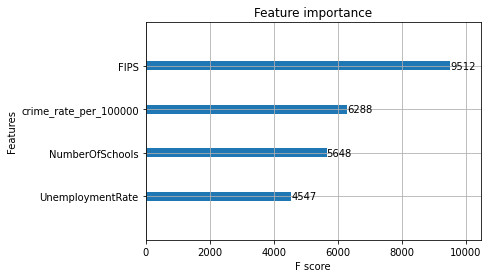

In [ ]:
from xgboost import plot_importance
plot_importance(xgboost)
plt.show()

In [ ]:
print("r2 of the model : ", r2_score(y_test, y_pred)) 

r2 of the model :  0.3816476247723922


In [ ]:
print ("These are the first five entries")
print (x_test[:5])
print ("These are the model prediction for these entries")
print (xgboost.predict(x_test[:5]))
print ("These are the actual prices")
print (y_test[:5])

These are the first five entries
      FIPS  UnemploymentRate  NumberOfSchools  crime_rate_per_100000
172  17201               5.4               92             854.933154
464  48091               3.3               48             268.399730
196  19169               1.6               28             142.847867
414  42071               3.4              115             165.974320
531  55127               2.9               42             117.538491
These are the model prediction for these entries
[11.65  11.635 12.031 12.351 12.046]
These are the actual prices
     AverageHousePrice
172          11.526862
464          12.112340
196          11.924260
414          11.964851
531          11.901938


## Modelo 2

In [ ]:
xgboost = XGBRegressor(objective ='reg:linear',
n_estimators=1500, learning_rate=0.08, gamma=0, subsample=0.75,
colsample_bytree=1, max_depth=7)

In [ ]:
dataset_mod_2 = dataset.sample(frac = 1)
dataset_mod_2.head()

,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
182,18095,Madison,Indiana,30,5,4.00,3.8,261.338729,78514.18,57.60,702.81
154,16019,Bonneville,Idaho,52,2,3.50,2.4,186.947180,113735.25,67.65,916.74
373,39089,Licking,Ohio,56,4,3.00,3.9,318.930958,184389.36,117.26,1320.04
321,36055,Monroe,New York,184,8,2.75,4.4,356.854134,114760.54,79.60,1198.14
503,51700,Newport News City,Virginia,50,5,3.00,3.7,416.987144,144166.28,97.06,1188.98


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribución del precio de venta (logaritmo)')

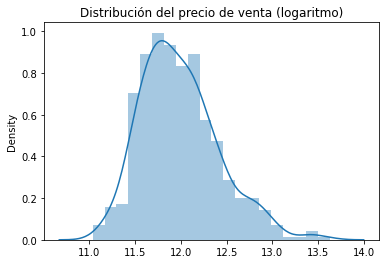

In [ ]:
dataset_mod_2[['AverageHousePrice']]  = np.log1p(dataset_mod_2[['AverageHousePrice']] )
sns.distplot(dataset_mod_2[['AverageHousePrice']]  )
plt.title('Distribución del precio de venta (logaritmo)')

In [ ]:
x = dataset_mod_2[['FIPS','UnemploymentRate', 'NumberOfSchools', 'crime_rate_per_100000', 'NumberOfHospitals']]
y = dataset_mod_2[['AverageHousePrice']] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
xgboost.fit(x_train, y_train)

[23:05:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred = xgboost.predict(x_test)
print("mse of the model : ", mean_squared_error(y_test, y_pred)) 

mse of the model :  0.10220248639703554


In [ ]:
print("This is the importance of each feature: {0}".format(xgboost.feature_importances_))

This is the importance of each feature: [0.245 0.213 0.187 0.208 0.146]


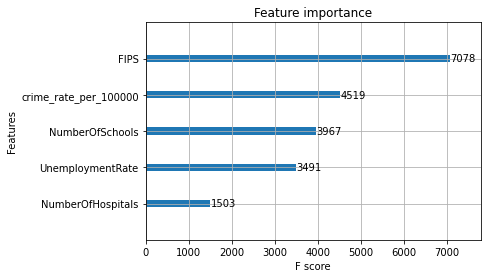

In [ ]:
from xgboost import plot_importance
plot_importance(xgboost)
plt.show()

In [ ]:
print("r2 of the model : ", r2_score(y_test, y_pred)) 

r2 of the model :  0.5517220212143743


In [ ]:
print ("These are the first five entries")
print (x_test[:5])
print ("These are the model prediction for these entries")
print (np.exp(xgboost.predict(x_test[:5])))
print ("These are the actual prices")
print (np.exp(y_test[:5]))

These are the first five entries
      FIPS  UnemploymentRate  ...  crime_rate_per_100000  NumberOfHospitals
283  30111               3.4  ...             288.008718                  3
164  17113               3.8  ...             320.074207                  2
30    6017               3.6  ...             244.309084                  3
222  22105               5.3  ...             952.859376                 10
260  27019               2.5  ...              62.786463                  1

[5 rows x 5 columns]
These are the model prediction for these entries
[141518.36  121397.47  286997.34   86328.516 214979.19 ]
These are the actual prices
     AverageHousePrice
283          155321.42
164          129791.42
30           311346.59
222          139842.00
260          234789.89


## Modelo 3

In [ ]:
xgboost = XGBRegressor(objective ='reg:linear',
n_estimators=1500, learning_rate=0.08, gamma=0, subsample=0.75,
colsample_bytree=1, max_depth=7)

In [ ]:
dataset_mod_3 = dataset.sample(frac = 1)
dataset_mod_3.head()

,FIPS,CountyName,StateName,NumberOfSchools,NumberOfHospitals,AverageHospitalRating,UnemploymentRate,crime_rate_per_100000,AverageHousePrice,ZHVIPerSqft_AllHomes,MedianRentalPrice_AllHomes
383,40017,Canadian,Oklahoma,47,2,2.99,2.9,450.354020,143500.00,85.66,1265.08
106,12091,Okaloosa,Florida,53,6,3.33,2.8,464.369927,158882.76,96.80,1096.57
467,48121,Denton,Texas,234,19,3.75,3.1,161.498575,173666.15,84.17,1571.54
227,24013,Carroll,Maryland,47,2,2.99,3.4,182.616791,253365.52,150.69,1637.84
226,24009,Calvert,Maryland,26,1,2.99,3.7,127.094293,265404.60,140.14,1675.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribución del precio de venta (logaritmo)')

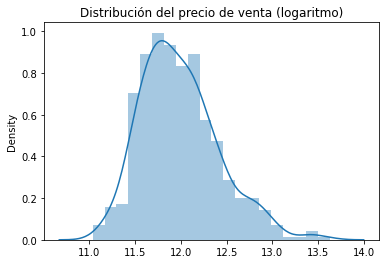

In [ ]:
dataset_mod_3[['AverageHousePrice']]  = np.log1p(dataset_mod_3[['AverageHousePrice']] )
sns.distplot(dataset_mod_3[['AverageHousePrice']]  )
plt.title('Distribución del precio de venta (logaritmo)')

In [ ]:
dataset_mod_3[['UnemploymentRate']]  = np.log1p(dataset_mod_3[['UnemploymentRate']] )
dataset_mod_3[['NumberOfSchools']]  = np.log1p(dataset_mod_3[['NumberOfSchools']] )
dataset_mod_3[['crime_rate_per_100000']]  = np.log1p(dataset_mod_3[['crime_rate_per_100000']] )
dataset_mod_3[['NumberOfHospitals']]  = np.log1p(dataset_mod_3[['NumberOfHospitals']] )

In [ ]:
x = dataset_mod_3[['FIPS','UnemploymentRate', 'NumberOfSchools', 'crime_rate_per_100000', 'NumberOfHospitals']]
y = dataset_mod_3[['AverageHousePrice']] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
xgboost.fit(x_train, y_train)

[23:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred = xgboost.predict(x_test)
print("mse of the model : ", mean_squared_error(y_test, y_pred)) 

mse of the model :  0.07874630804753542


In [ ]:
print("This is the importance of each feature: {0}".format(xgboost.feature_importances_))

This is the importance of each feature: [0.251 0.215 0.203 0.187 0.143]


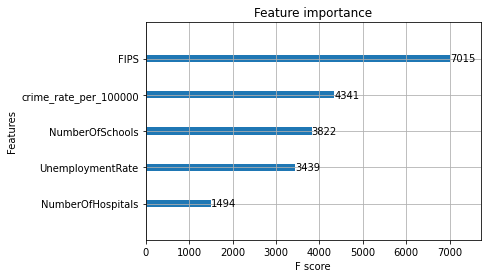

In [ ]:
from xgboost import plot_importance
plot_importance(xgboost)
plt.show()

In [ ]:
print("r2 of the model : ", r2_score(y_test, y_pred)) 

r2 of the model :  0.5542248980038161


In [ ]:
print ("These are the first five entries")
print (x_test[:5])
print ("These are the model prediction for these entries")
print (xgboost.predict(x_test[:5]))
print ("These are the actual prices")
print (y_test[:5])

These are the first five entries
      FIPS  UnemploymentRate  ...  crime_rate_per_100000  NumberOfHospitals
315  35049          0.966695  ...               1.928061           0.869742
84   12001          0.889981  ...               2.002464           1.080418
411  42043          0.959135  ...               1.983166           1.162283
532  55133          0.824585  ...               1.637520           1.194706
379  39133          0.995009  ...               1.692082           0.526589

[5 rows x 5 columns]
These are the model prediction for these entries
[12.013 11.819 11.68  12.217 11.937]
These are the actual prices
     AverageHousePrice
315          12.429746
84           11.807576
411          11.776743
532          12.327207
379          11.817743


## Modelo 4


In [ ]:
data_mod_4 = dataset_mod_2[['FIPS','NumberOfSchools','NumberOfHospitals','UnemploymentRate','crime_rate_per_100000', 'AverageHousePrice']]
data_mod_4.head()

,FIPS,NumberOfSchools,NumberOfHospitals,UnemploymentRate,crime_rate_per_100000,AverageHousePrice
182,18095,30,5,3.8,261.338729,11.271047
154,16019,52,2,2.4,186.947180,11.641637
373,39089,56,4,3.9,318.930958,12.124810
321,36055,184,8,4.4,356.854134,11.650612
503,51700,50,5,3.7,416.987144,11.878730


In [ ]:
X= data_mod_4.iloc[:,0:5]
Y= data_mod_4.iloc[:,5]
x, y = np.array(X), np.array(Y)

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.23698458453962612
intercept: 12.48888603943702
slope: [-3.194e-06  1.639e-03 -1.486e-02 -8.406e-02 -4.624e-04]
